### This exercise was performed on ARCC Beartooth with the following environment/software packages:

#### Load Preinstalled Modules:
module load gcc12.2.0 miniconda3 git/2.37.0

#### Create environment then activate with:
conda env create -f whatev_ml_env.yml
conda activate whatev_ml_env

#### Make sure jupyter can see the kernel in your conda env so you can select from southpass interface dropdown:
python -m ipykernel install --user --name=whatev_conda

#### Download data to folder and extract
wget https://archive.ics.uci.edu/static/public/186/wine+quality.zip
unzip wine+quality.zip


### In prior exercises, we performed exploratory data analysis and cleaned our data initially - now we will perform machine learning on the data which we've already cleaned.

## ML Algorithm Selection: Directions

For this exercise, we will have a look at the simplest version of Automated Machine Learning and choose the best type of machine learning model for a given task. The end result (i.e. the predictive performance) is not important; how you get there is.

Your deliverable will be a report, written in a style that it would be suitable for inclusion in an academic paper as the "Experimental Setup" section or similar. If unsure, check an academic paper of your choice, for example this one. The level of detail should be higher than in a typical academic paper though. Your report should be at most five pages, including references and figures but excluding appendices. It should have the following structure:

1. Introduction: What problem are you solving, how are you going to solve it.
Dataset Description: Describe the data you're using, e.g. how many features and observations, what are you predicting, any missing values, etc.
2. Experimental Setup: What specifically are you doing to solve the problem, i.e. what programming languages and libraries, how are you processing the data, what machine learning algorithms are you considering, how are you evaluating them, etc.
3. Results: Description of what you observed, including plots.
4. Code: Add the code you've used as a separate file.

Your report must contain enough detail to reproduce what you did without the code. If in doubt, include more detail.

There is no required format for the report. You could, for example, use an iPython notebook.

## Data
We will have a look at the Wine Quality dataset. Choose the one that corresponds to your preference in wine. You may also use a dataset of your choice, for example one that's relevant to your research.

Choose a small number of different machine learning algorithms. For example, you
could use a random forest, support vector machine, linear/logistic regression, a
decision/regression tree learner, and gradient boosting. You will also have to
choose their hyperparameters, e.g. the default values. Determine the best
machine learning algorithm for your dataset, where the "best" algorithm could be
a set of algorithms. Make sure that the way you evaluate this avoids bias and
overfitting. You could use statistical tests to make this determination.

## Submission
Add your report and code to this repository. Bonus points if you can set up a Github action to automatically run the code and generate the report!

## Introduction: 

What problem are you solving, how are you going to solve it. Dataset Description: Describe the data you're using, e.g. how many features and observations, what are you predicting, any missing values, etc.

### What problem we're solving: 
We are looking at the wine quality dataset, and trying to run a small number of machine learning algorithms on the dataset to determine the best machine learning algorithm for the dataset, where the "best" algorithm may be a set of algorithms.  

We know that this particular dataset is supervised and the problem is a classification problem with a known number of categories.  Therefore we know that the best ML models will be in that realm. 

To make an initial decision, this decision chart from sklearn was followed: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

A decision was made to evaluate a number of popular Classification ML Models/Algorithms, since it was hard to be sure which would be more effective.  
The machine learning algorithms that fit best with this particular dataset are as follows and therefore we will utilize these listed in our initial ML model selection:

1. Kmeans Clustering
2. Support Vector Machine
3. KNeighbor Classifier
4. SGD Classifier
5. Neural Network

While neural networks are not listed in the above decision chart, they are frequently used when training ML models due to their flexibility for use in a wide variety of ML problems, on different data types, and generally high level of performance.  Therefore, they were included in this exercise.  

### Data Information: 


In [591]:
#importing all necessary libraries
import os,sys,platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch as torch
import seaborn as sb
import sklearn as sk
from copy import deepcopy as copy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay as showMatrix

from IPython.display import Image



In [592]:
#confirm and checking platform and sotware versions in software stack
print(f"Python Platform:{platform.platform()}")
print(f"Python {sys.version}")
print(f"PyTorch Version: ", torch.__version__)
print(f"Pandas Version: " , pd.__version__)
print(f"SkLearn Version: " , sk. __version__)

Python Platform:macOS-14.0-arm64-arm-64bit
Python 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:41:52) [Clang 15.0.7 ]
PyTorch Version:  2.1.1
Pandas Version:  2.1.4
SkLearn Version:  1.3.0


In [593]:
#checking devices available,though I know this is unfortunately not usable here, I always include it in my code 
#So I can know what the run can "see"

available_gpus = [torch.cuda.device(i) for i in range(torch.cuda.device_count())]
# print the names
for i in available_gpus:
    print(torch.cuda.get_device_properties(i).name)

# Prints 'Tesla V100-SXM2-16GB', for example
print(torch.version.cuda)
device = torch.device('cuda' if torch.cuda.is_available() or torch.backends.mps.is_available() else 'cpu')
print("Using device: ", device)

None
Using device:  cuda


In [594]:
#Class to display pdfs as embedded pdf within iframe - we'll need it to display the final paper.

class PDF(object):
  def __init__(self, pdf, size=(800,1200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)


In [595]:
#Make sure we're pointing at the right directory in relation to where we are.
print(os.getcwd())

#Import data and separate out
whitewinedataraw = pd.read_csv("winequality-white.csv",sep=';')
redwinedataraw = pd.read_csv("winequality-red.csv", sep=';')

#view raw data, get info about it, clean if necessary
whitewinedataraw.info() #information about range
whitewinedataraw.describe() #Description of features
whitewinedataraw.duplicated() #Do we have any duplicate values in our data?
cat_col = [col for col in whitewinedataraw.columns if whitewinedataraw[col].dtype=='object']
num_col = [col for col in whitewinedataraw.columns if whitewinedataraw[col].dtype!='object']
print("Categorical columns: ", cat_col)
print("Numerical columns: ", num_col)

redwinedataraw.info()
redwinedataraw.describe()
redwinedataraw.duplicated()
cat_col = [col for col in redwinedataraw.columns if redwinedataraw[col].dtype=='object']
num_col = [col for col in redwinedataraw.columns if redwinedataraw[col].dtype!='object']
print("Categorical columns: ", cat_col)
print("Numerical columns: ", num_col)

/Users/lisa/Documents/GitHub/ml-algorithm-selection-lrstafford
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
Categorical columns:  []
Numerical columns:  ['fixed acidity', 

In [596]:
whitewinedata = whitewinedataraw.copy()
whitewinelabels = whitewinedata.pop('quality')
display(whitewinelabels)

redwinedata = redwinedataraw.copy()
redwinelabels = redwinedata.pop('quality')
display(redwinelabels)

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

Because Standard Scaling worked best in the last exercise, we apply the same data transformation on the dataset again, in this exercise.  Code copied from Exploratory Data Analysis repo: https://github.com/COSC5557/exploratory-data-analysis-lrstafford/blob/main/wine_data.ipynb 




In [597]:
#Transform and scale our data and pull out labels

transredwinedata = redwinedataraw.copy()
transwhitewinedata = whitewinedataraw.copy()
whitewinelabels = transwhitewinedata.pop('quality')
redwinelabels = transredwinedata.pop('quality')

scaledred = StandardScaler().fit_transform(transredwinedata)
scaledwhite = StandardScaler().fit_transform(transwhitewinedata)


We'll be defining classes for each ML algorithm in the next couple sections:

1. Kmeans Clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
2. Support Vector Machine
    1. Linear: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
    2. Classic: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
3. KNeighbor Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
4. SGD Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
5. Neural Network: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network

In [598]:
#Set up initial classifications 
def classify(data,labels):
    data, labels = make_classification(n_features=11,n_classes = 7, random_state=0)

In [599]:
#Make an empty pandas dataframe in which to store model performance data:
performance_scores = pd.DataFrame(columns=['Model_Type',
                                           'Wine_Type', 
                                           'Training_Score', 
                                           'Test_Score'])

display(performance_scores)

,Model_Type,Wine_Type,Training_Score,Test_Score


In [600]:
#Define a standard function for ML training using kmeans clustering
#Unless otherwise indicated, we will stick with the default hyperparameters from sklearn
def kmeanstrain(data, labels, winetype):
   
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=.8, shuffle=True, random_state=0)

    X_train.shape, X_test.shape

    kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(data,labels)

    trainpred = kmeans.predict(X_train)
    testpred = kmeans.predict(X_test)

    trainacc = accuracy_score(trainpred, y_train)
    testacc = accuracy_score(testpred, y_test)
    

    print("Accuracy of Kmeans on ", winetype, " training is: ", trainacc)
    print("Accuracy of Kmeans on ", winetype, " test data is: ", testacc)

    winematrix = cm(y_test, testpred, labels=[3,4,5,6,7,8,9])
    disp=showMatrix(winematrix)
    disp.plot()
    plt.show()
    
    return trainacc, testacc
    

In [601]:
#Define a standard function for ML training using a Linear SVM
#Unless otherwise indicated, we stick with default hyperparameters from sklearn
def lin_svc(data,labels,winetype):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=.8, shuffle=True, random_state=0)
    X_train.shape, X_test.shape
    l_svc = LinearSVC(penalty='l2', dual=False, random_state=0, tol=1e-4, C=100, multi_class="ovr")
    l_svc.fit(X_train, y_train)
    
    trainpred = l_svc.predict(X_train)
    testpred = l_svc.predict(X_test)
    
    trainacc = accuracy_score(trainpred, y_train)
    testacc = accuracy_score(testpred, y_test)
    
    #import scoring into dataframe
    performance_scores.loc[len(performance_scores)] = ['Linear SVC', winetype, trainacc, testacc]
         
    print("Accuracy of Linear SVC", winetype, "training is: ", trainacc)
    print("Accuracy of Linear SVC on", winetype, "test data is: ", testacc)

    winematrix = cm(y_test, testpred)
    disp=showMatrix(winematrix, display_labels=[3,4,5,6,7,8])
    disp.plot()
    plt.show()
    
    return testacc
    

In [602]:
#Define a standard function for ML training using a Polynomial SVM
#Unless otherwise indicated, we stick with default hyperparameters from sklearn
def svmsvc(data,labels,winetype):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=.8, shuffle=True, random_state=0)
    X_train.shape, X_test.shape
    svmsvc = SVC(C=10, kernel='poly')
    svmsvc.fit(X_train, y_train)
    
    trainpred = svmsvc.predict(X_train)
    testpred = svmsvc.predict(X_test)
    
    trainacc = accuracy_score(trainpred, y_train)
    testacc = accuracy_score(testpred, y_test)

    #import scoring into dataframe
    performance_scores.loc[len(performance_scores)] = ['Polynomial SVC', winetype, trainacc, testacc]
    
    print("Accuracy of Polynomial SVC", winetype, "training is:", trainacc)
    print("Accuracy of Polynomial SVC on", winetype, "test data is:", testacc)

    winematrix = cm(y_test, testpred)
    disp=showMatrix(winematrix, display_labels=[3,4,5,6,7,8])
    disp.plot()
    plt.show()
    
    return testacc

In [603]:
#Define a standard function for ML training using a K-Nearest Neighbor Model
#Unless otherwise indicated, we stick with default hyperparameters from sklearn
def knn(data,labels,winetype):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=.8, shuffle=True, random_state=0)
    X_train.shape, X_test.shape
    kneighbor = KNeighborsClassifier(n_neighbors=10, weights='distance') #Default knn = 5
    kneighbor.fit(X_train, y_train)
    
    trainpred = kneighbor.predict(X_train)
    testpred = kneighbor.predict(X_test)
    
    trainacc = accuracy_score(trainpred, y_train)
    testacc = accuracy_score(testpred, y_test)
    
    #import scoring into dataframe
    performance_scores.loc[len(performance_scores)] = ['K-Nearest Neighbor', winetype, trainacc, testacc]
    
    print("Accuracy of KNN on", winetype, "training is:", trainacc)
    print("Accuracy of KNN on", winetype, "test data is:", testacc)

    winematrix = cm(y_test, testpred)
    disp=showMatrix(winematrix, display_labels=[3,4,5,6,7,8])
    disp.plot()
    plt.show()
    
    return trainacc, testacc

In [604]:
#Define a standard function for ML training using a Stochastic Gradient Descent Classifier
#Unless otherwise indicated, we stick with default hyperparameters from sklearn
def sgd(data,labels,winetype):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=.8, shuffle=True, random_state=0)
    X_train.shape, X_test.shape
    sgdclass = SGDClassifier(loss='log_loss') 
    sgdclass.fit(X_train, y_train)
    
    trainpred = sgdclass.predict(X_train)
    testpred = sgdclass.predict(X_test)
    
    trainacc = accuracy_score(trainpred, y_train)
    testacc = accuracy_score(testpred, y_test)
    
    #import scoring into dataframe
    performance_scores.loc[len(performance_scores)] = ['SGD Classifier', winetype, trainacc, testacc]
    
    print("Accuracy SGD Classifier on", winetype, "training is:", trainacc)
    print("Accuracy of SGD Classifier on", winetype, "test data is:", testacc)

    winematrix = cm(y_test, testpred)
    disp=showMatrix(winematrix, display_labels=[3,4,5,6,7,8])
    disp.plot()
    plt.show()
    
    return trainacc, testacc

In [605]:
#Define a standard function for ML training using a Multilayer Perceptron Classifier
#Unless otherwise indicated, we stick with default hyperparameters from sklearn
def mlp(data,labels,winetype):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=.8, shuffle=True, random_state=0)
    X_train.shape, X_test.shape
    mlpc = MLPClassifier() 
    mlpc.fit(X_train, y_train)
    trainpred = mlpc.predict(X_train)
    testpred = mlpc.predict(X_test)
    
    trainacc = accuracy_score(trainpred, y_train)
    testacc = accuracy_score(testpred, y_test)
    
    #import scoring into dataframe
    performance_scores.loc[len(performance_scores)] = ['MultiLayer Perceptron', winetype, trainacc, testacc]
    
    print("Accuracy MLP NN Classifier on", winetype, "training is:", trainacc)
    print("Accuracy of MLP NN Classifier on", winetype, "test data is:", testacc)

    winematrix = cm(y_test, testpred)
    disp=showMatrix(winematrix, display_labels=[3,4,5,6,7,8])
    disp.plot()
    plt.show()
    
    return testacc

Accuracy of Linear SVC white training is:  0.5380296069423175
Accuracy of Linear SVC on white test data is:  0.49183673469387756


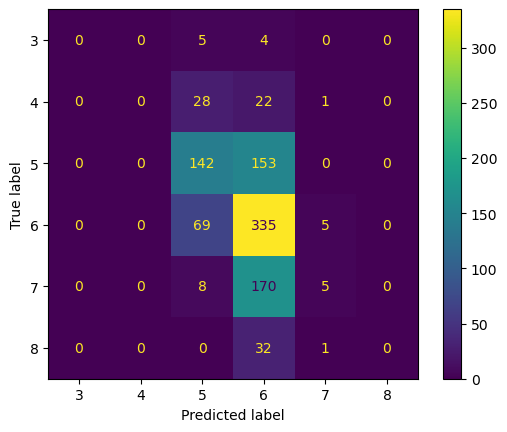

Accuracy of Linear SVC white training is:  0.5380296069423175
Accuracy of Linear SVC on white test data is:  0.49183673469387756


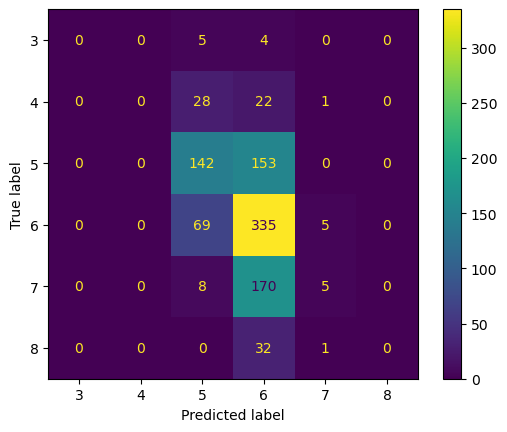

Accuracy of Linear SVC white training is:  0.5380296069423175
Accuracy of Linear SVC on white test data is:  0.49183673469387756


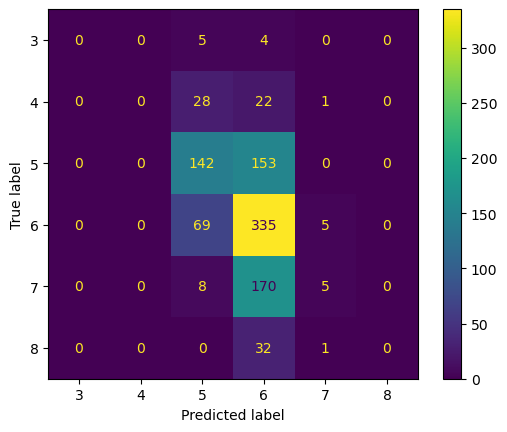

Accuracy of Linear SVC white training is:  0.5380296069423175
Accuracy of Linear SVC on white test data is:  0.49183673469387756


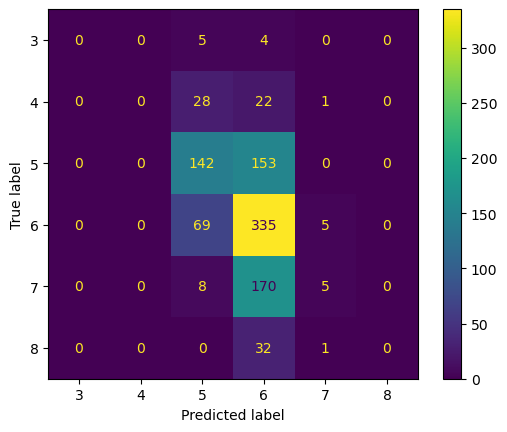

Accuracy of Linear SVC white training is:  0.5380296069423175
Accuracy of Linear SVC on white test data is:  0.49183673469387756


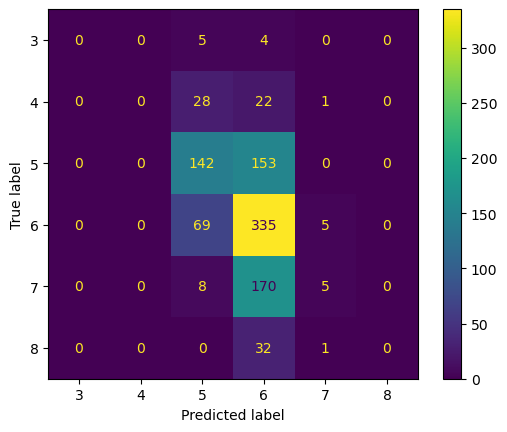

Accuracy of Linear SVC white training is:  0.5380296069423175
Accuracy of Linear SVC on white test data is:  0.49183673469387756


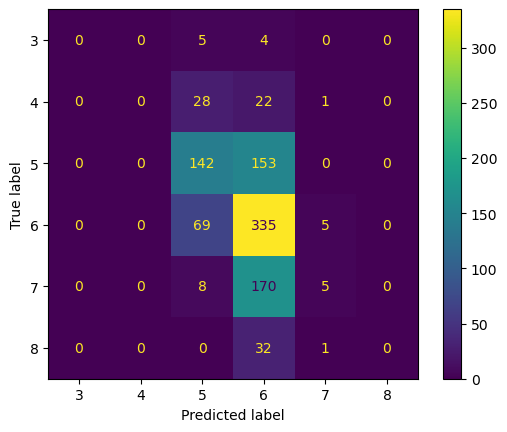

Accuracy of Linear SVC white training is:  0.5380296069423175
Accuracy of Linear SVC on white test data is:  0.49183673469387756


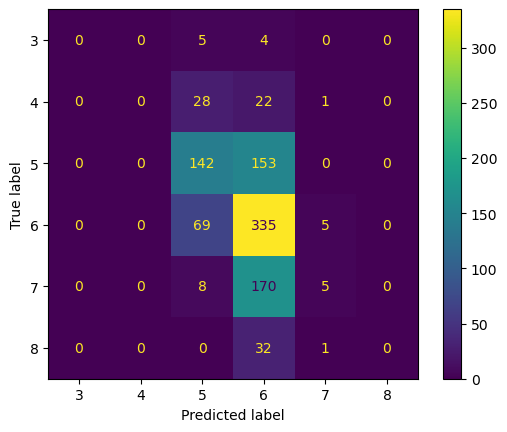

Accuracy of Linear SVC white training is:  0.5380296069423175
Accuracy of Linear SVC on white test data is:  0.49183673469387756


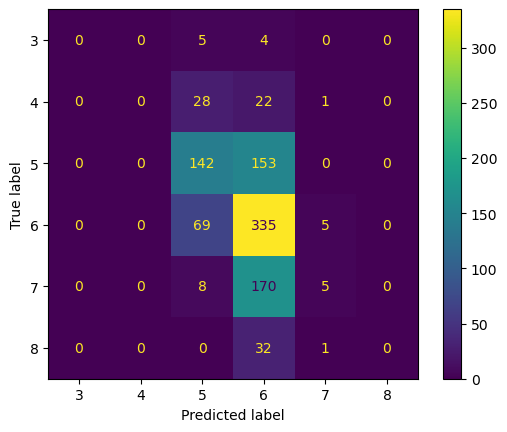

Accuracy of Linear SVC white training is:  0.5380296069423175
Accuracy of Linear SVC on white test data is:  0.49183673469387756


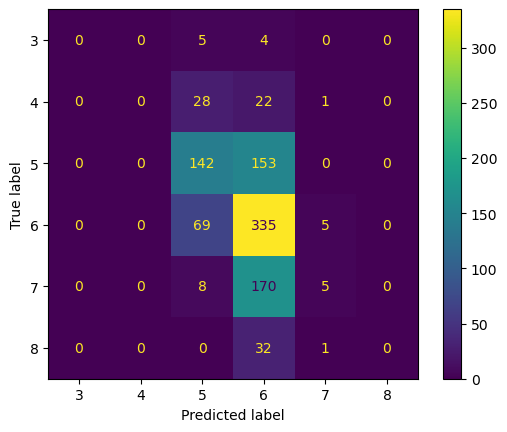

Accuracy of Linear SVC white training is:  0.5380296069423175
Accuracy of Linear SVC on white test data is:  0.49183673469387756


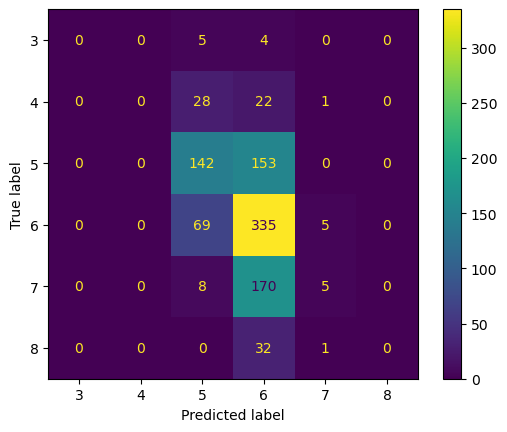

Accuracy of Linear SVC red training is:  0.5801407349491791
Accuracy of Linear SVC on red test data is:  0.628125


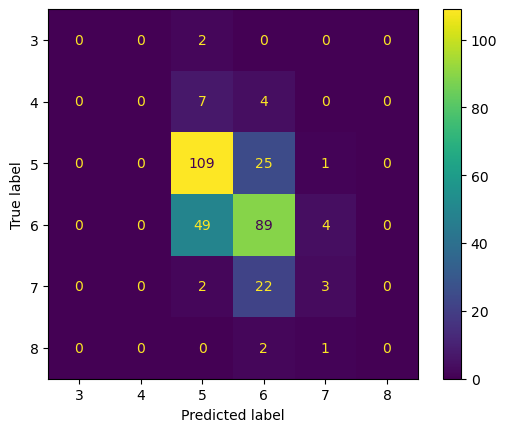

Accuracy of Linear SVC red training is:  0.5801407349491791
Accuracy of Linear SVC on red test data is:  0.628125


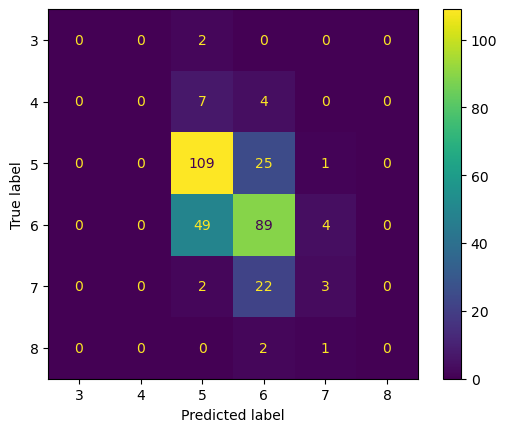

Accuracy of Linear SVC red training is:  0.5801407349491791
Accuracy of Linear SVC on red test data is:  0.628125


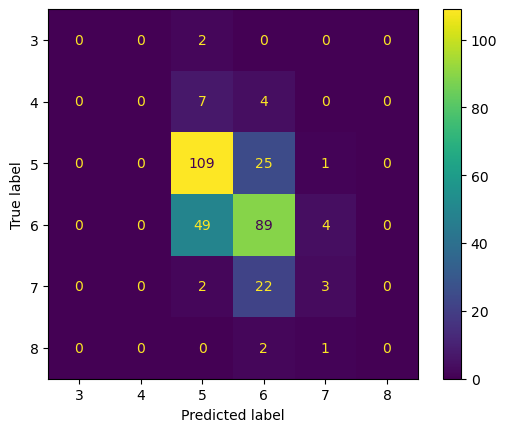

Accuracy of Linear SVC red training is:  0.5801407349491791
Accuracy of Linear SVC on red test data is:  0.628125


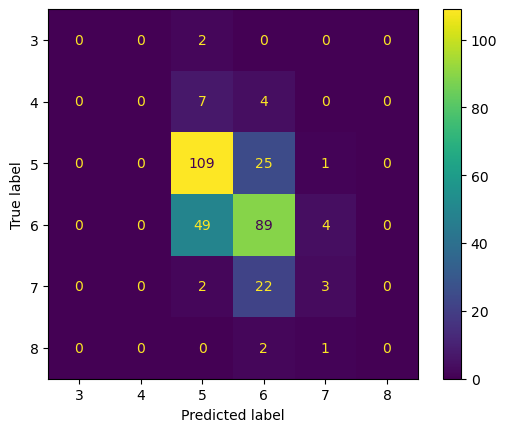

Accuracy of Linear SVC red training is:  0.5801407349491791
Accuracy of Linear SVC on red test data is:  0.628125


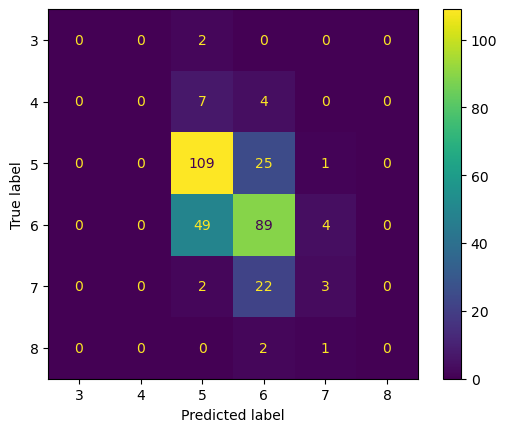

Accuracy of Linear SVC red training is:  0.5801407349491791
Accuracy of Linear SVC on red test data is:  0.628125


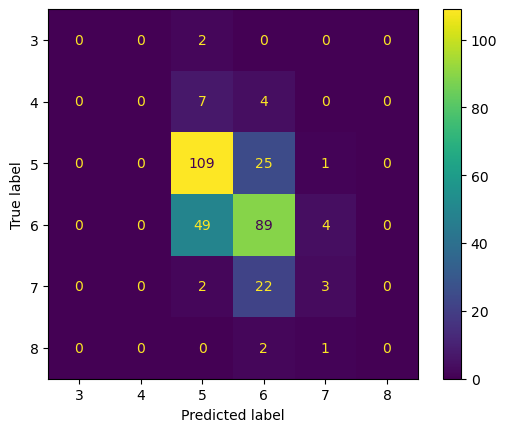

Accuracy of Linear SVC red training is:  0.5801407349491791
Accuracy of Linear SVC on red test data is:  0.628125


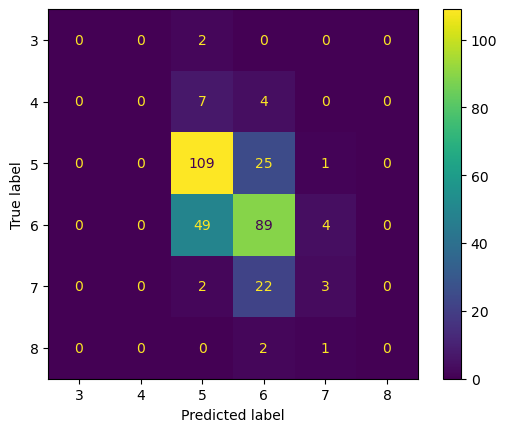

Accuracy of Linear SVC red training is:  0.5801407349491791
Accuracy of Linear SVC on red test data is:  0.628125


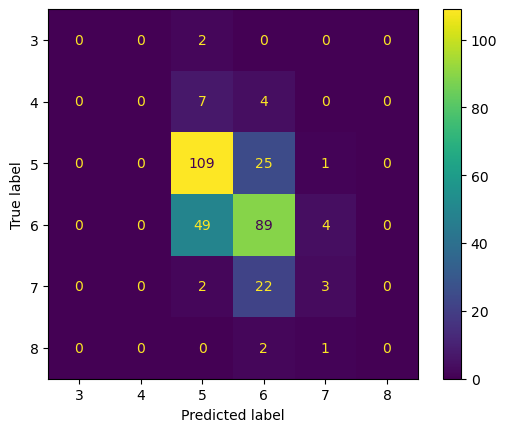

Accuracy of Linear SVC red training is:  0.5801407349491791
Accuracy of Linear SVC on red test data is:  0.628125


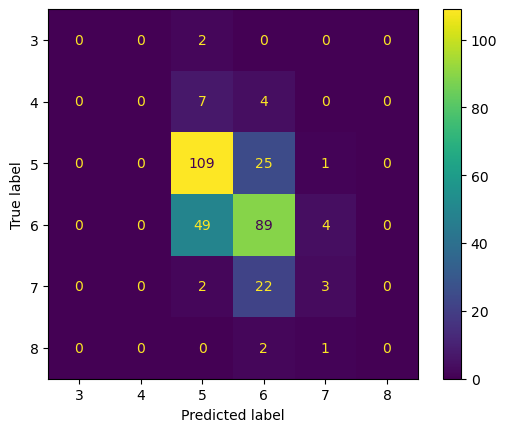

Accuracy of Linear SVC red training is:  0.5801407349491791
Accuracy of Linear SVC on red test data is:  0.628125


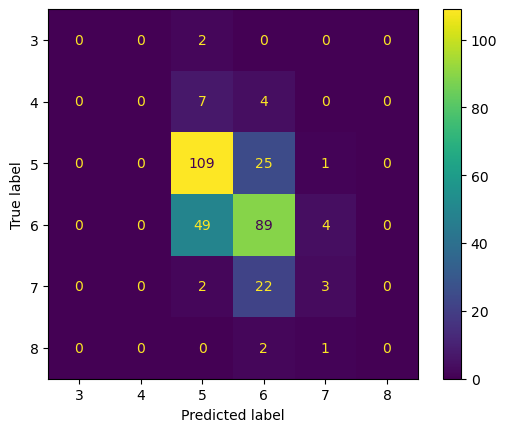

In [606]:
for i in range(10): 
    lin_svc(whitewinedata, whitewinelabels, "white")
for i in range(10): 
    lin_svc(redwinedata, redwinelabels, "red")


Accuracy of Polynomial SVC white training is: 0.4650331801939765
Accuracy of Polynomial SVC on white test data is: 0.4316326530612245


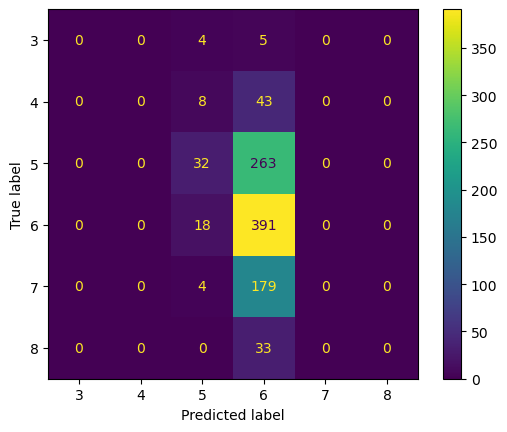

Accuracy of Polynomial SVC white training is: 0.4650331801939765
Accuracy of Polynomial SVC on white test data is: 0.4316326530612245


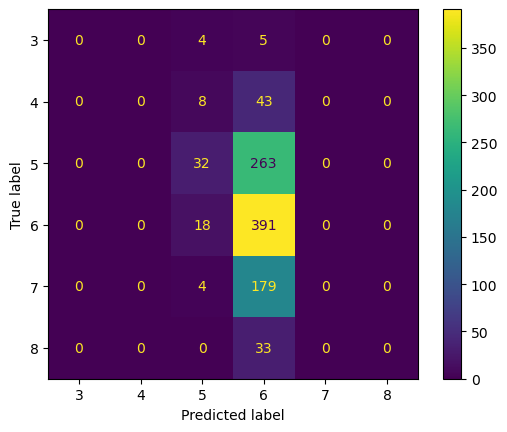

Accuracy of Polynomial SVC white training is: 0.4650331801939765
Accuracy of Polynomial SVC on white test data is: 0.4316326530612245


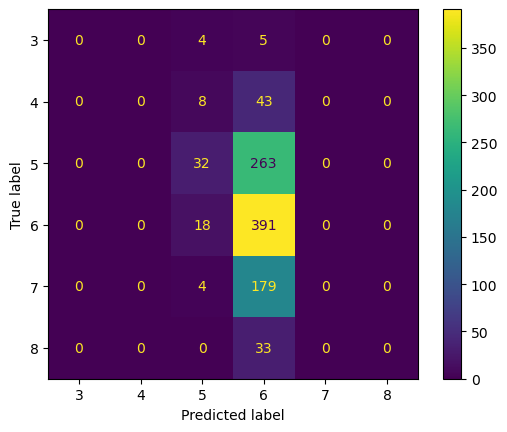

Accuracy of Polynomial SVC white training is: 0.4650331801939765
Accuracy of Polynomial SVC on white test data is: 0.4316326530612245


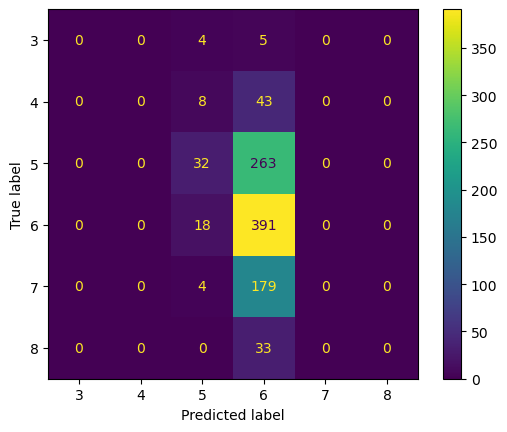

Accuracy of Polynomial SVC white training is: 0.4650331801939765
Accuracy of Polynomial SVC on white test data is: 0.4316326530612245


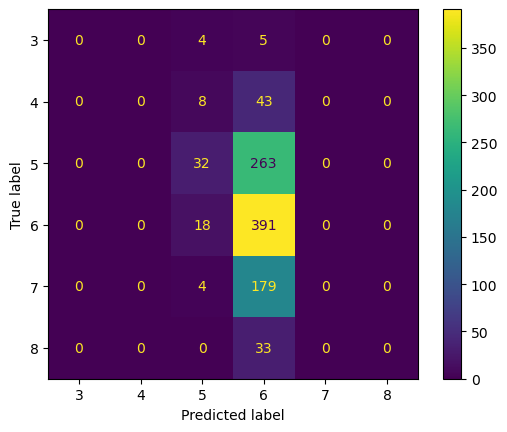

Accuracy of Polynomial SVC white training is: 0.4650331801939765
Accuracy of Polynomial SVC on white test data is: 0.4316326530612245


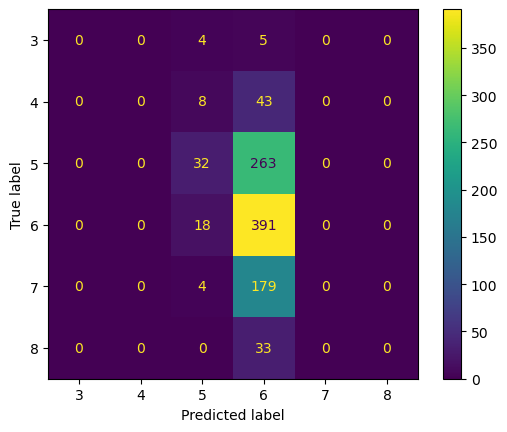

Accuracy of Polynomial SVC white training is: 0.4650331801939765
Accuracy of Polynomial SVC on white test data is: 0.4316326530612245


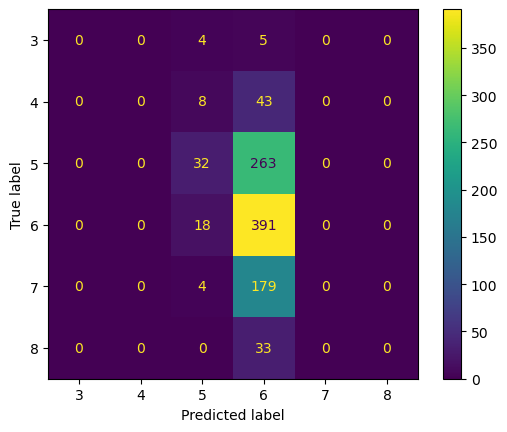

Accuracy of Polynomial SVC white training is: 0.4650331801939765
Accuracy of Polynomial SVC on white test data is: 0.4316326530612245


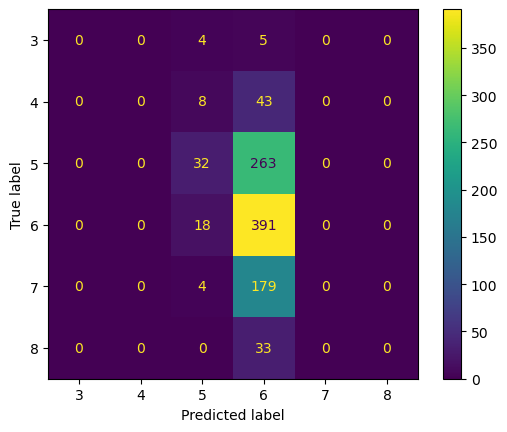

Accuracy of Polynomial SVC white training is: 0.4650331801939765
Accuracy of Polynomial SVC on white test data is: 0.4316326530612245


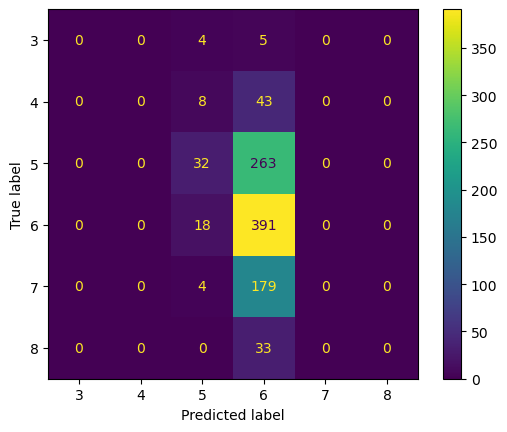

Accuracy of Polynomial SVC white training is: 0.4650331801939765
Accuracy of Polynomial SVC on white test data is: 0.4316326530612245


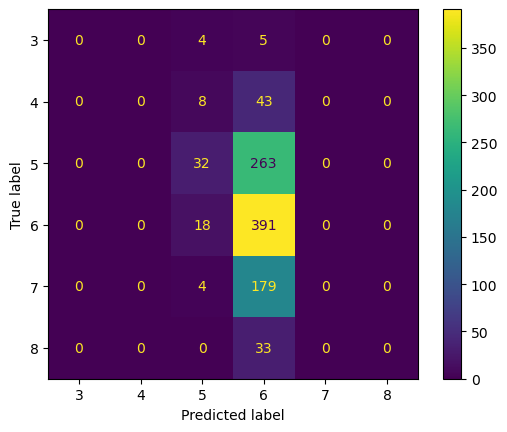

Accuracy of Polynomial SVC red training is: 0.509773260359656
Accuracy of Polynomial SVC on red test data is: 0.528125


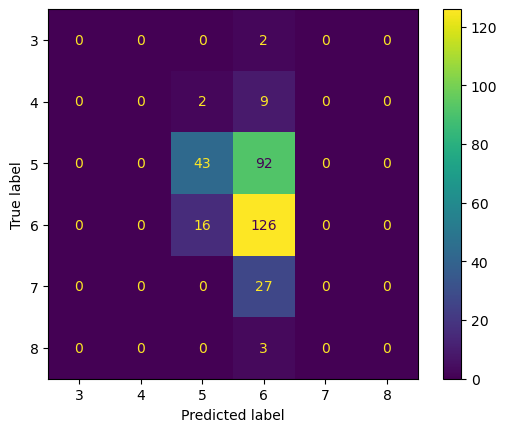

Accuracy of Polynomial SVC red training is: 0.509773260359656
Accuracy of Polynomial SVC on red test data is: 0.528125


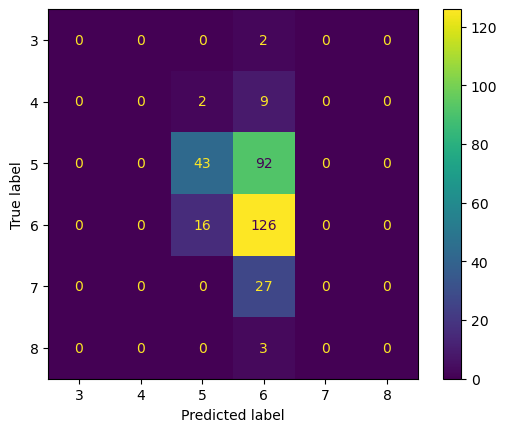

Accuracy of Polynomial SVC red training is: 0.509773260359656
Accuracy of Polynomial SVC on red test data is: 0.528125


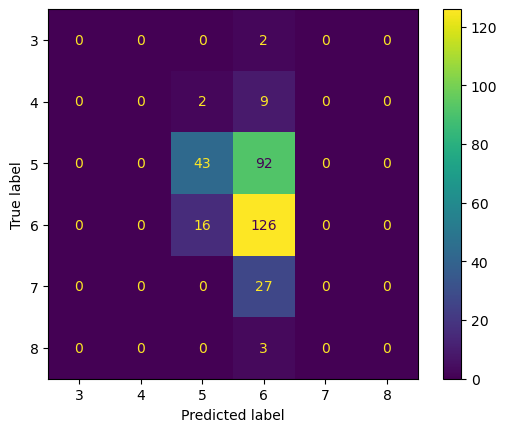

Accuracy of Polynomial SVC red training is: 0.509773260359656
Accuracy of Polynomial SVC on red test data is: 0.528125


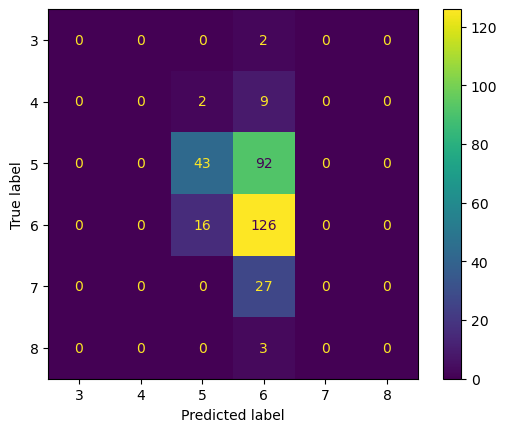

Accuracy of Polynomial SVC red training is: 0.509773260359656
Accuracy of Polynomial SVC on red test data is: 0.528125


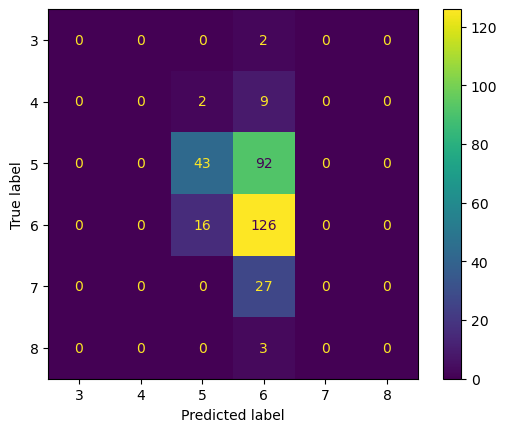

Accuracy of Polynomial SVC red training is: 0.509773260359656
Accuracy of Polynomial SVC on red test data is: 0.528125


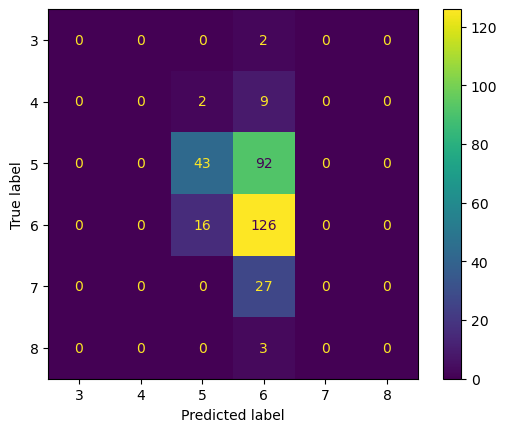

Accuracy of Polynomial SVC red training is: 0.509773260359656
Accuracy of Polynomial SVC on red test data is: 0.528125


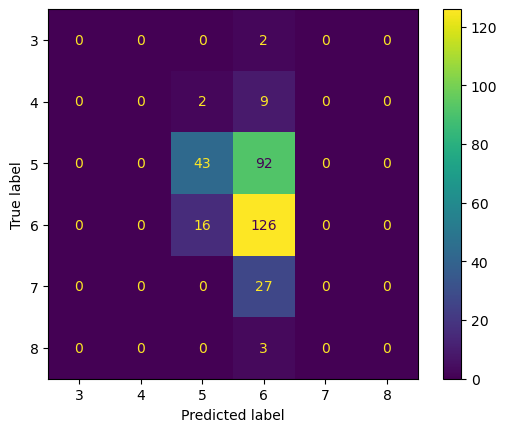

Accuracy of Polynomial SVC red training is: 0.509773260359656
Accuracy of Polynomial SVC on red test data is: 0.528125


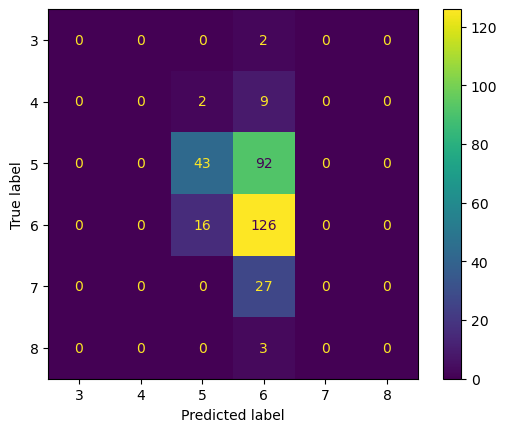

Accuracy of Polynomial SVC red training is: 0.509773260359656
Accuracy of Polynomial SVC on red test data is: 0.528125


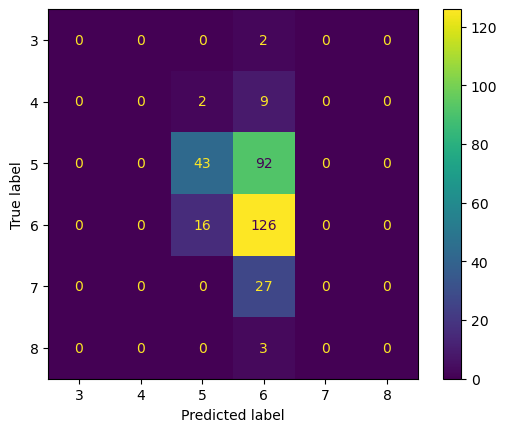

Accuracy of Polynomial SVC red training is: 0.509773260359656
Accuracy of Polynomial SVC on red test data is: 0.528125


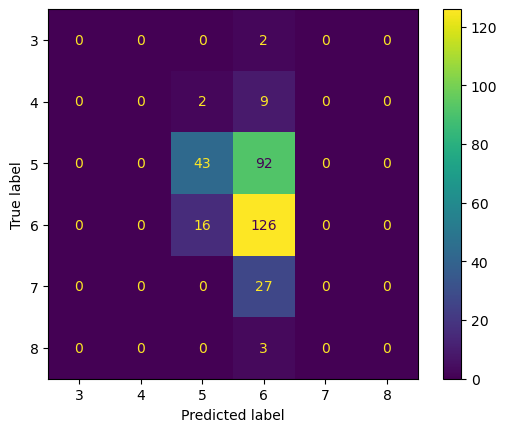

In [607]:
for i in range(10): 
    svmsvc(whitewinedata, whitewinelabels, "white")
for i in range(10): 
    svmsvc(redwinedata, redwinelabels, "red")

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.5806122448979592


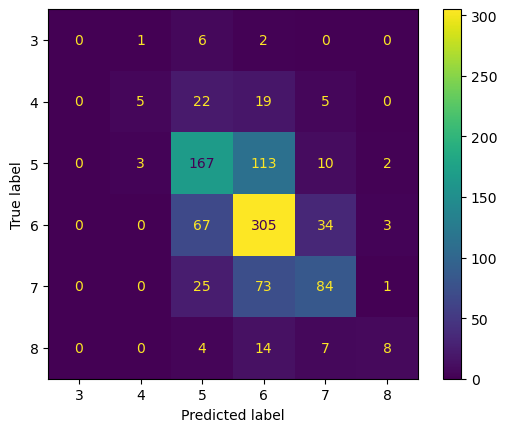

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.5806122448979592


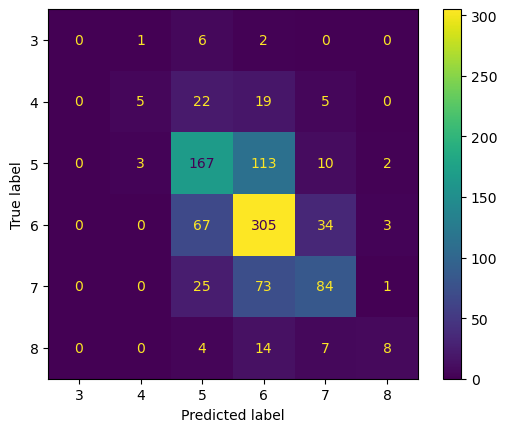

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.5806122448979592


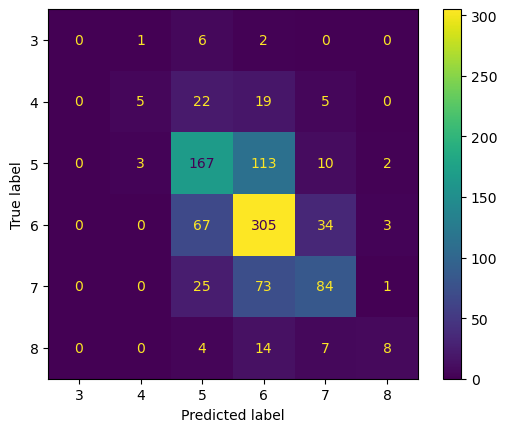

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.5806122448979592


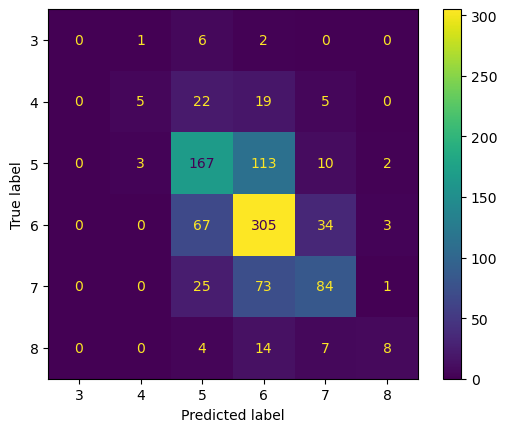

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.5806122448979592


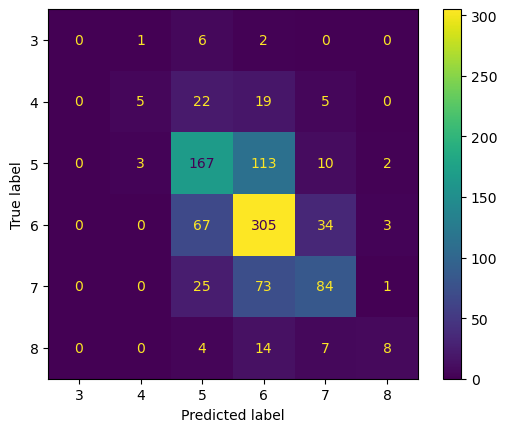

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.5806122448979592


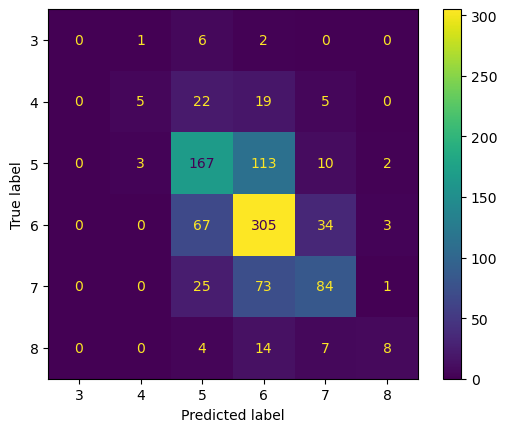

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.5806122448979592


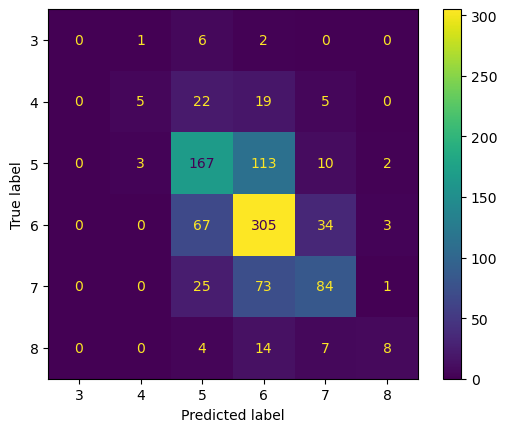

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.5806122448979592


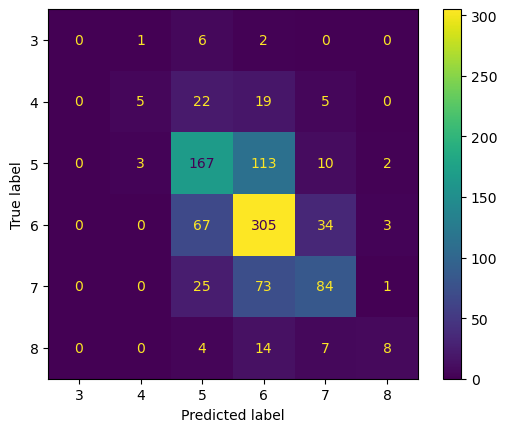

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.5806122448979592


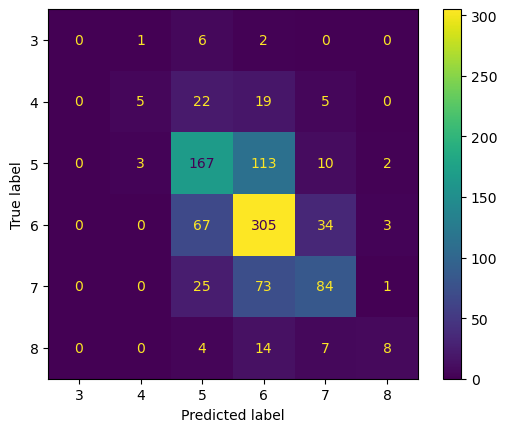

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.5806122448979592


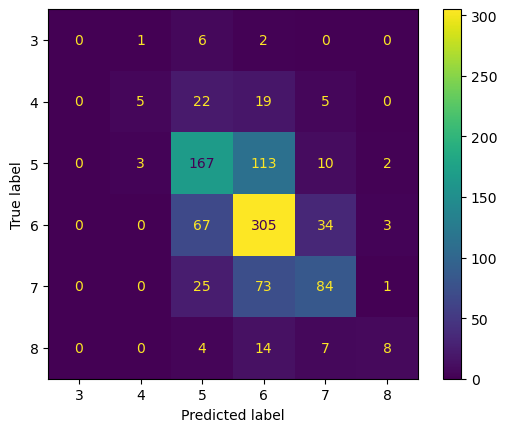

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.61875


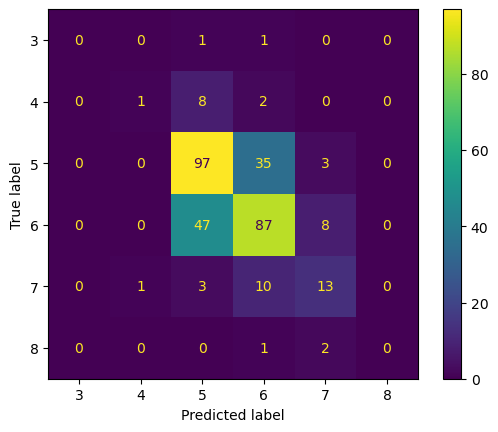

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.61875


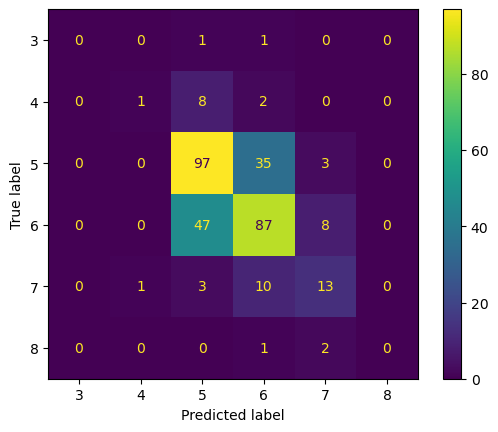

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.61875


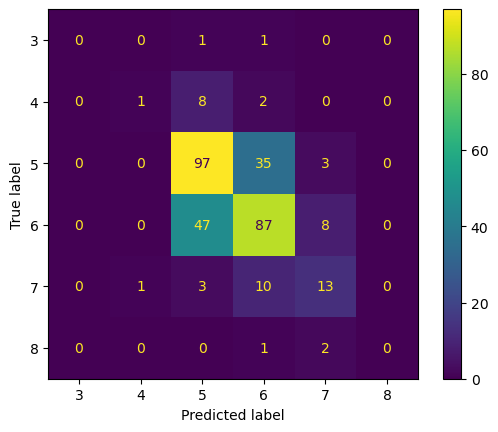

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.61875


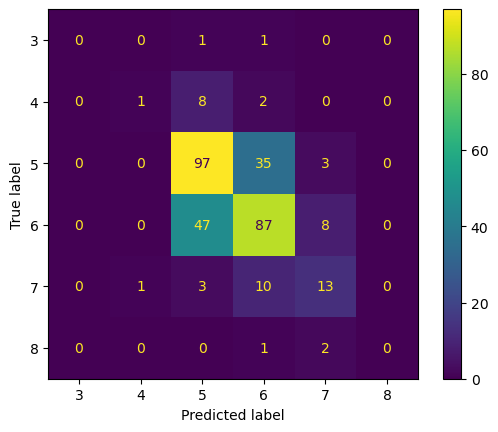

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.61875


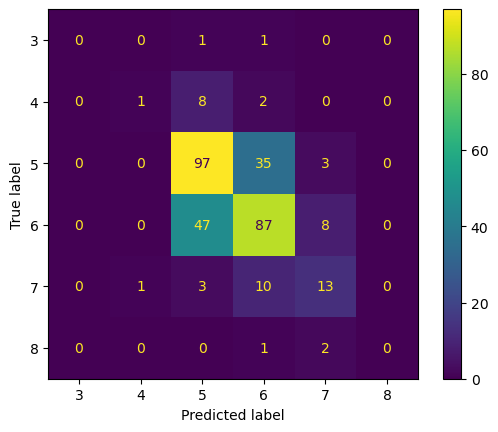

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.61875


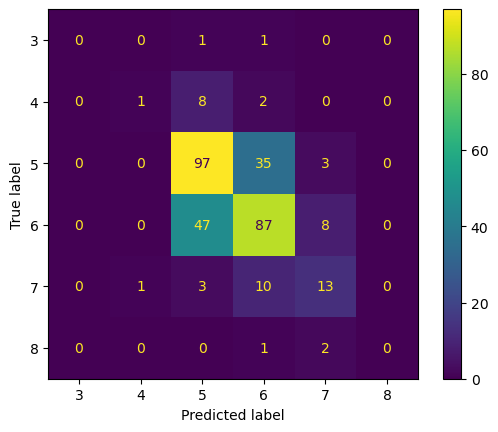

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.61875


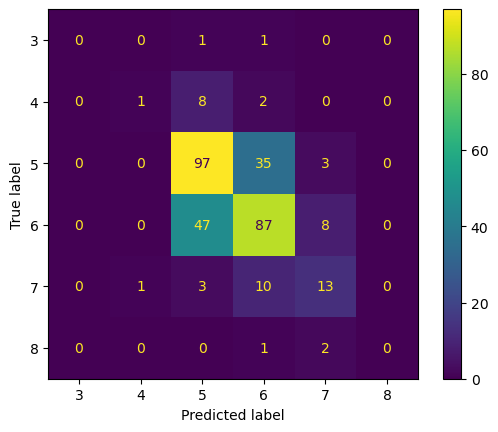

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.61875


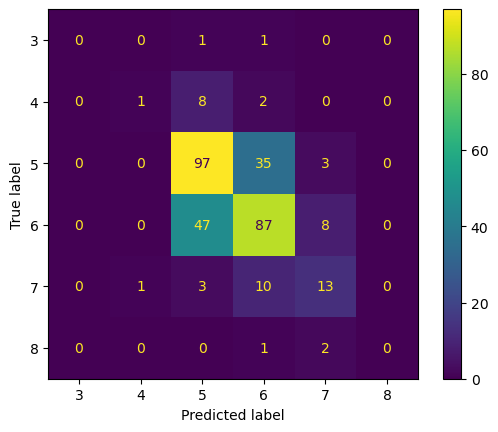

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.61875


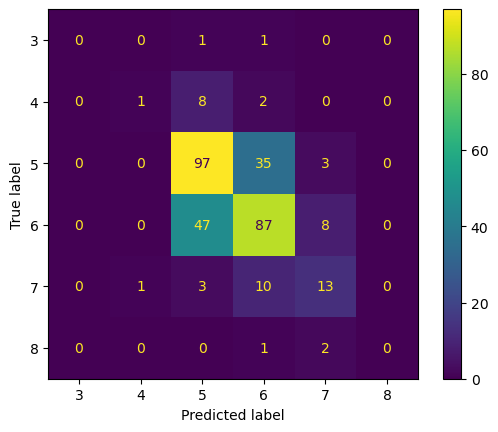

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.61875


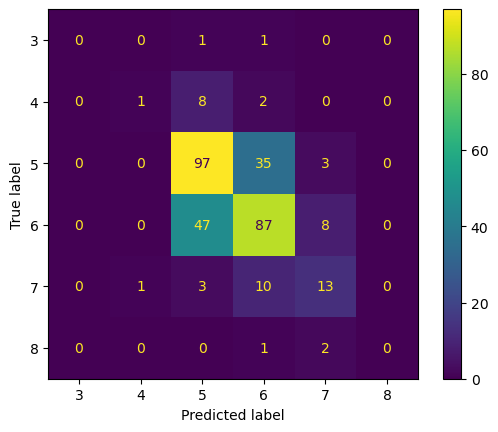

In [608]:
for i in range(10): 
    knn(whitewinedata, whitewinelabels, "white")
for i in range(10): 
    knn(redwinedata, redwinelabels, "red")

Accuracy SGD Classifier on white training is: 0.3657478305257785
Accuracy of SGD Classifier on white test data is: 0.373469387755102


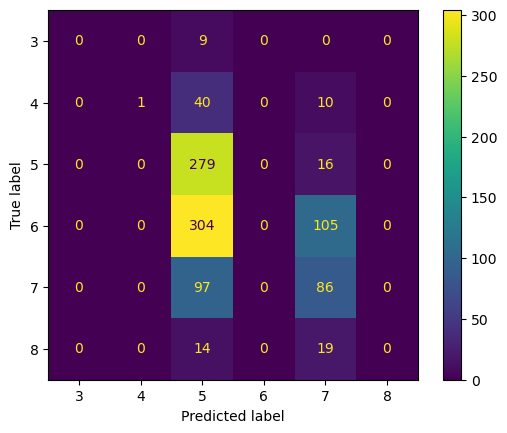

Accuracy SGD Classifier on white training is: 0.3588565594691169
Accuracy of SGD Classifier on white test data is: 0.3693877551020408


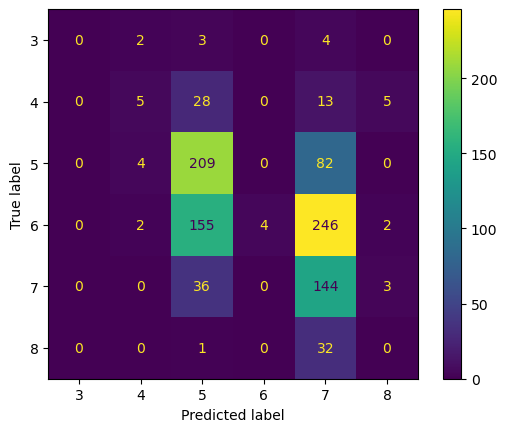

Accuracy SGD Classifier on white training is: 0.4987238386932108
Accuracy of SGD Classifier on white test data is: 0.48367346938775513


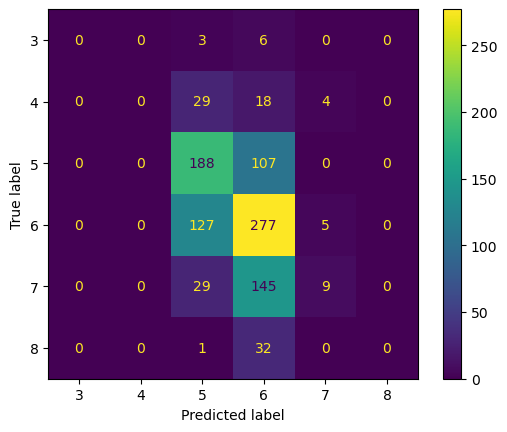

Accuracy SGD Classifier on white training is: 0.2730985196528841
Accuracy of SGD Classifier on white test data is: 0.29285714285714287


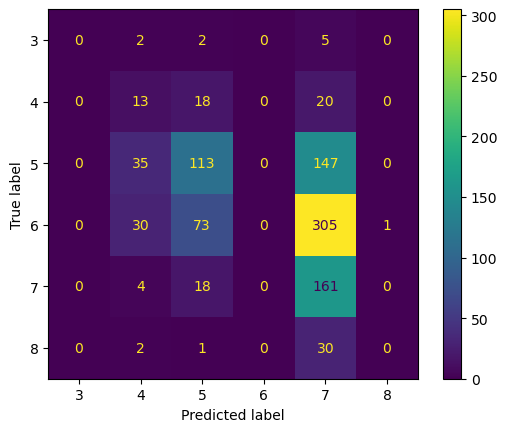

Accuracy SGD Classifier on white training is: 0.4622256253190403
Accuracy of SGD Classifier on white test data is: 0.4193877551020408


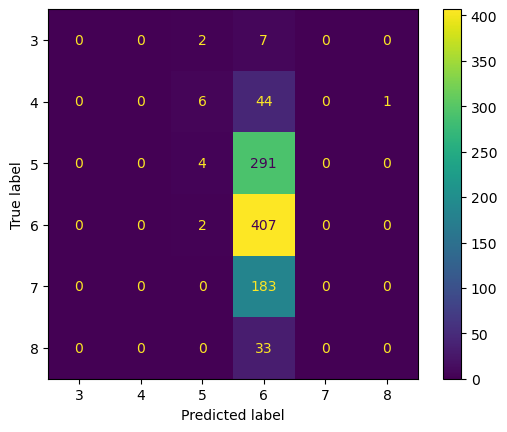

Accuracy SGD Classifier on white training is: 0.18478815722307299
Accuracy of SGD Classifier on white test data is: 0.19693877551020408


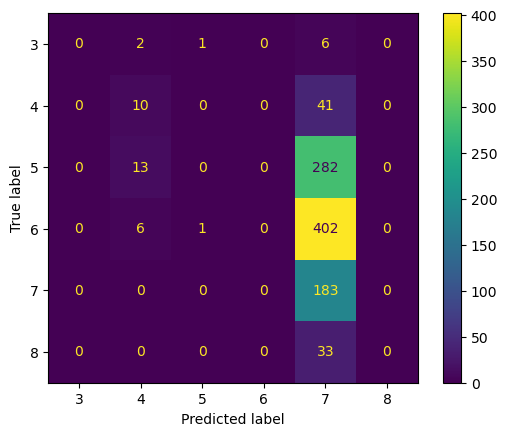

Accuracy SGD Classifier on white training is: 0.4571209800918836
Accuracy of SGD Classifier on white test data is: 0.4091836734693878


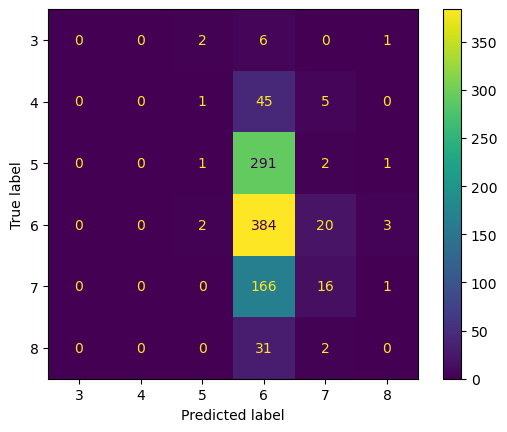

Accuracy SGD Classifier on white training is: 0.36881061766207246
Accuracy of SGD Classifier on white test data is: 0.37755102040816324


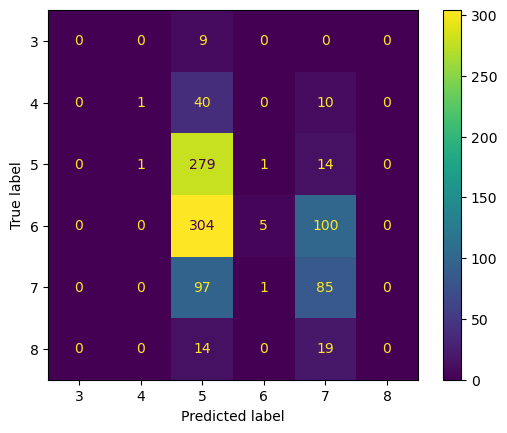

Accuracy SGD Classifier on white training is: 0.3708524757529352
Accuracy of SGD Classifier on white test data is: 0.376530612244898


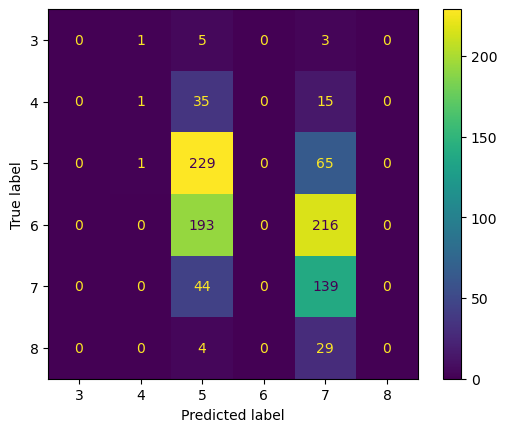

Accuracy SGD Classifier on white training is: 0.3818274629913221
Accuracy of SGD Classifier on white test data is: 0.3806122448979592


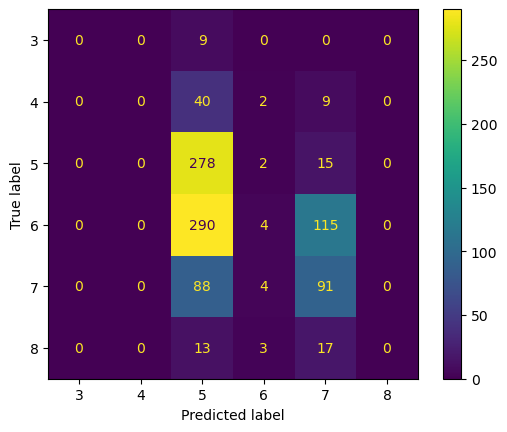

Accuracy SGD Classifier on red training is: 0.49960906958561374
Accuracy of SGD Classifier on red test data is: 0.55625


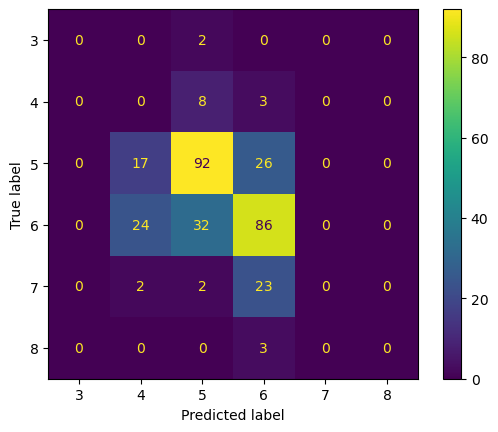

Accuracy SGD Classifier on red training is: 0.43862392494136043
Accuracy of SGD Classifier on red test data is: 0.4375


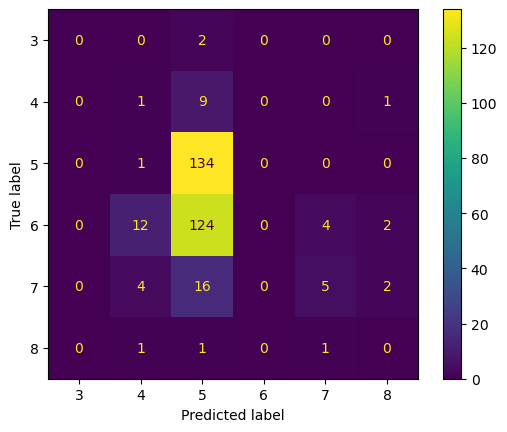

Accuracy SGD Classifier on red training is: 0.48866301798279904
Accuracy of SGD Classifier on red test data is: 0.509375


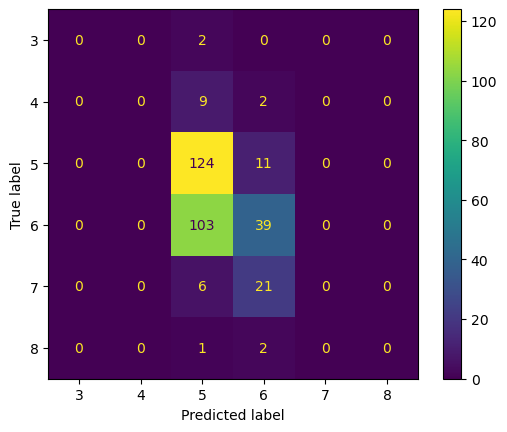

Accuracy SGD Classifier on red training is: 0.48866301798279904
Accuracy of SGD Classifier on red test data is: 0.575


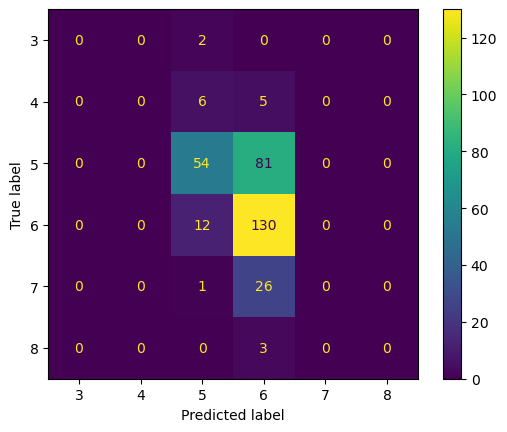

Accuracy SGD Classifier on red training is: 0.5199374511336982
Accuracy of SGD Classifier on red test data is: 0.540625


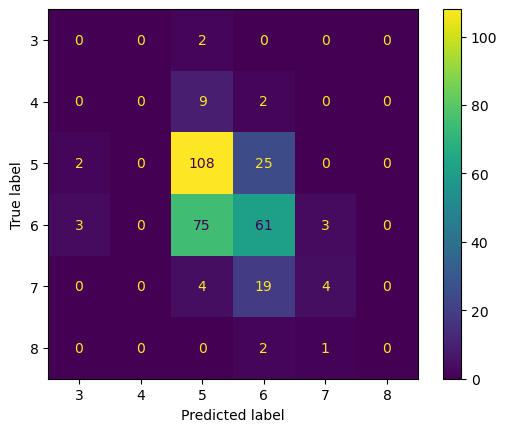

Accuracy SGD Classifier on red training is: 0.47849882720875686
Accuracy of SGD Classifier on red test data is: 0.50625


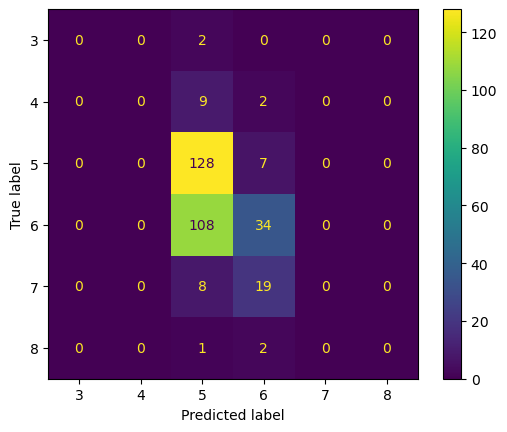

Accuracy SGD Classifier on red training is: 0.4104769351055512
Accuracy of SGD Classifier on red test data is: 0.403125


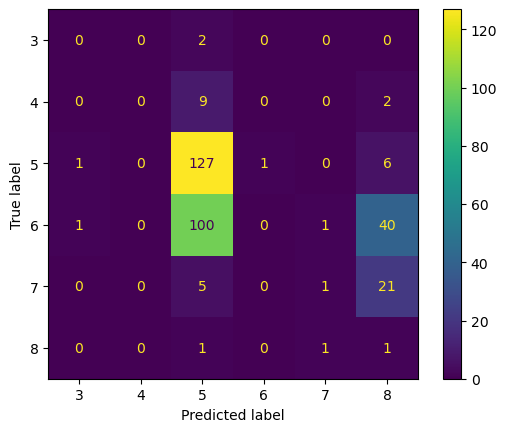

Accuracy SGD Classifier on red training is: 0.4878811571540266
Accuracy of SGD Classifier on red test data is: 0.509375


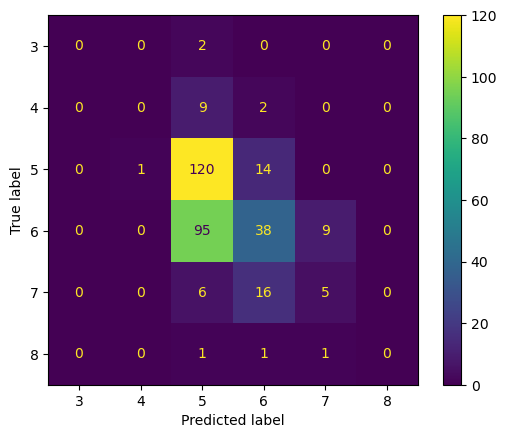

Accuracy SGD Classifier on red training is: 0.5590304925723222
Accuracy of SGD Classifier on red test data is: 0.609375


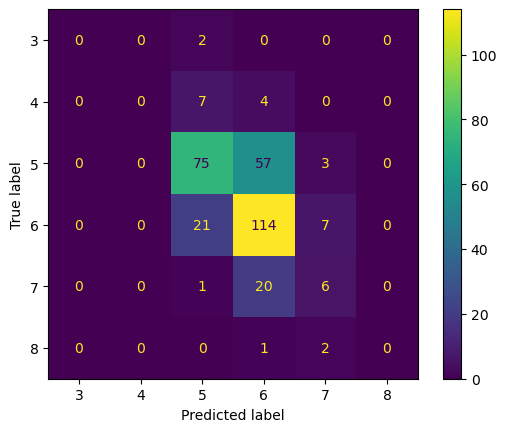

Accuracy SGD Classifier on red training is: 0.5285379202501954
Accuracy of SGD Classifier on red test data is: 0.5625


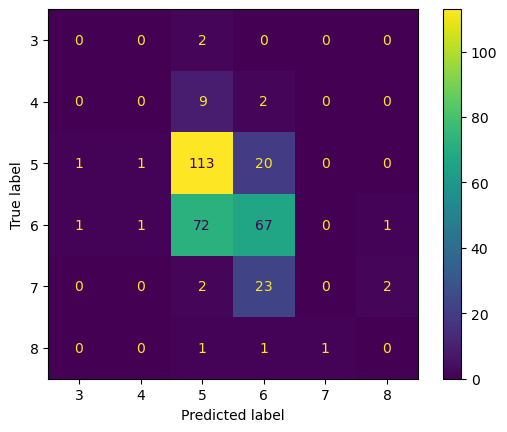

In [630]:
for i in range(10): 
    sgd(whitewinedata, whitewinelabels, "white")
for i in range(10): 
    sgd(redwinedata, redwinelabels, "red")

Accuracy MLP NN Classifier on white training is: 0.49106687085247575
Accuracy of MLP NN Classifier on white test data is: 0.4306122448979592


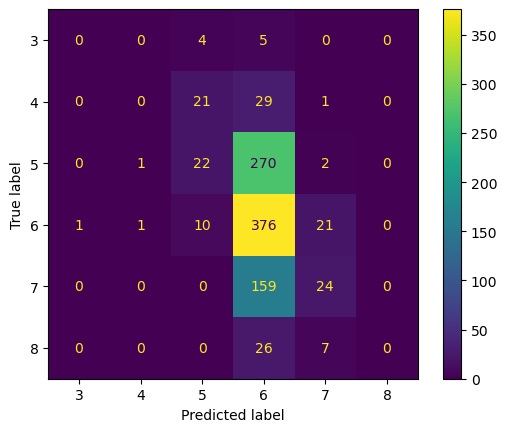

Accuracy MLP NN Classifier on white training is: 0.5352220520673813
Accuracy of MLP NN Classifier on white test data is: 0.47959183673469385


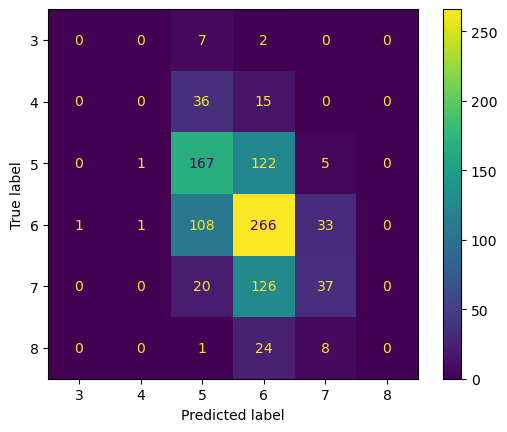

Accuracy MLP NN Classifier on white training is: 0.5438999489535478
Accuracy of MLP NN Classifier on white test data is: 0.4846938775510204


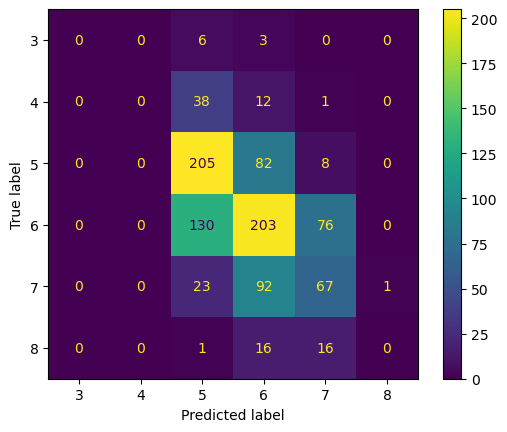

Accuracy MLP NN Classifier on white training is: 0.521694742215416
Accuracy of MLP NN Classifier on white test data is: 0.4602040816326531


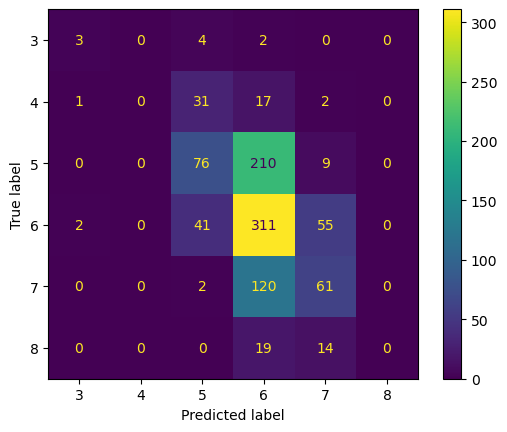

Accuracy MLP NN Classifier on white training is: 0.5117406840224604
Accuracy of MLP NN Classifier on white test data is: 0.44693877551020406


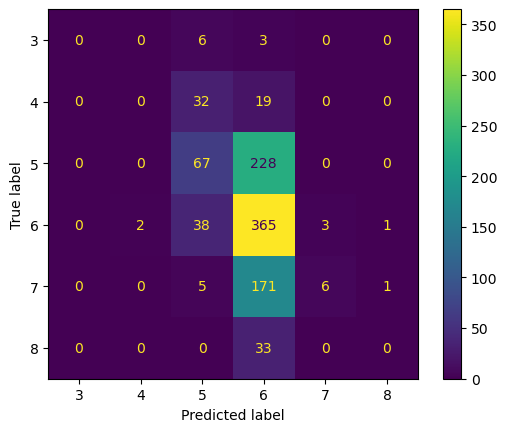

Accuracy MLP NN Classifier on white training is: 0.5178662582950485
Accuracy of MLP NN Classifier on white test data is: 0.4663265306122449


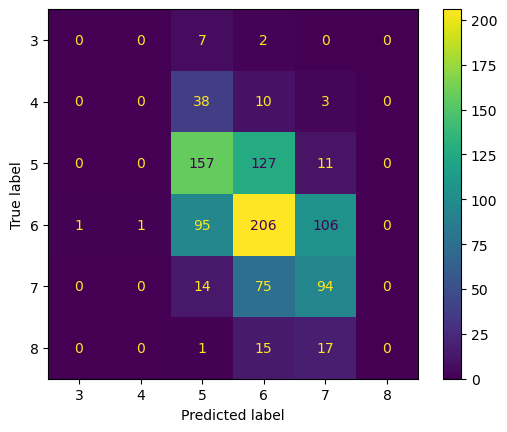

Accuracy MLP NN Classifier on white training is: 0.5222052067381318
Accuracy of MLP NN Classifier on white test data is: 0.46224489795918366


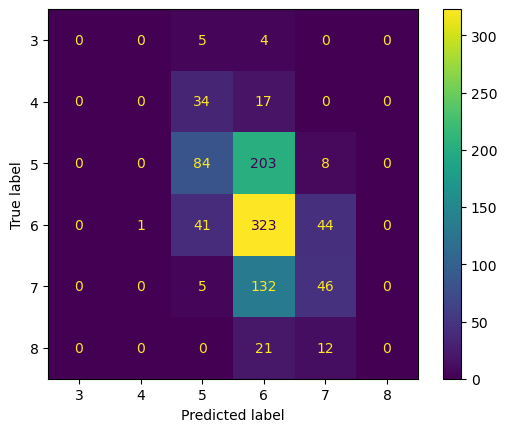

Accuracy MLP NN Classifier on white training is: 0.5102092904543134
Accuracy of MLP NN Classifier on white test data is: 0.4326530612244898


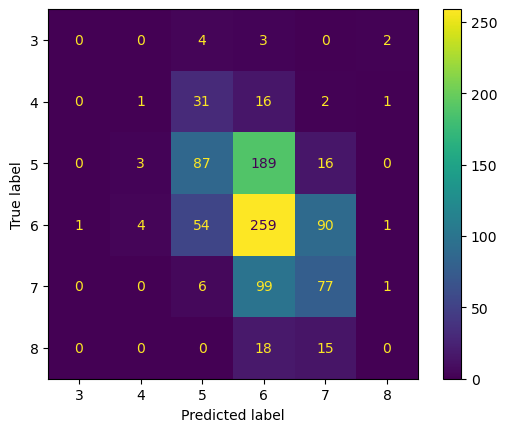

Accuracy MLP NN Classifier on white training is: 0.5119959162838182
Accuracy of MLP NN Classifier on white test data is: 0.4785714285714286


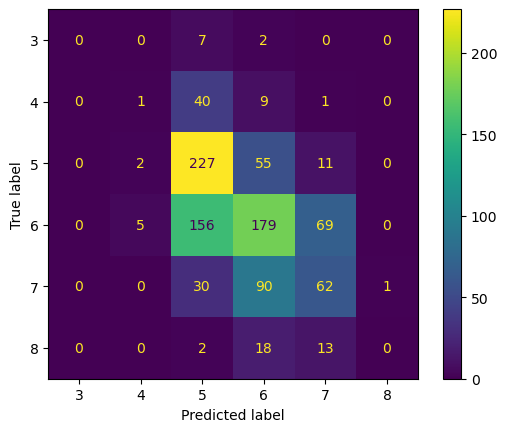

Accuracy MLP NN Classifier on white training is: 0.5104645227156712
Accuracy of MLP NN Classifier on white test data is: 0.4387755102040816


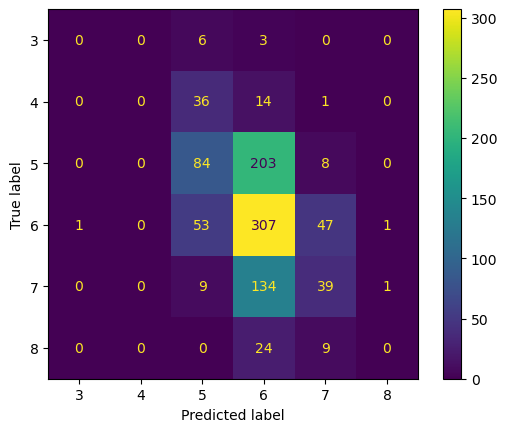

Accuracy MLP NN Classifier on red training is: 0.6114151681000782
Accuracy of MLP NN Classifier on red test data is: 0.60625


/Users/lisa/miniconda3/envs/jupyter/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


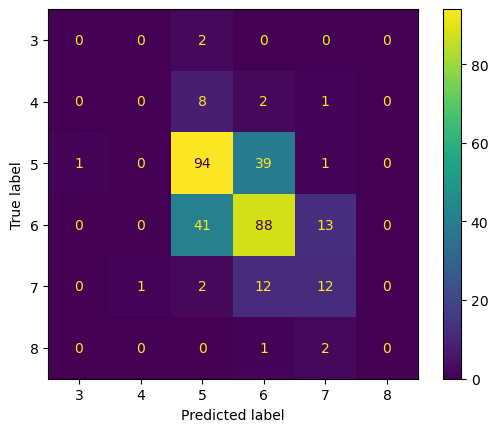

Accuracy MLP NN Classifier on red training is: 0.5903049257232212
Accuracy of MLP NN Classifier on red test data is: 0.603125


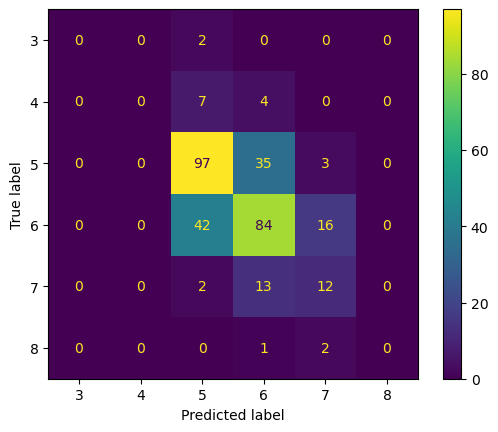

Accuracy MLP NN Classifier on red training is: 0.602814698983581
Accuracy of MLP NN Classifier on red test data is: 0.615625


/Users/lisa/miniconda3/envs/jupyter/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


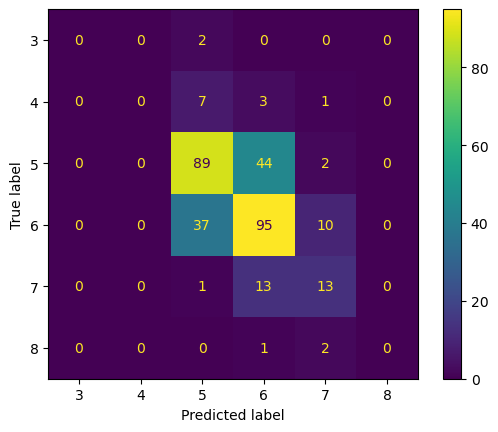

Accuracy MLP NN Classifier on red training is: 0.6020328381548085
Accuracy of MLP NN Classifier on red test data is: 0.628125


/Users/lisa/miniconda3/envs/jupyter/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


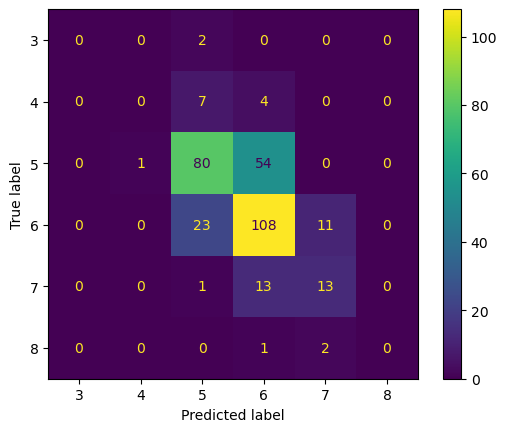

Accuracy MLP NN Classifier on red training is: 0.6012509773260359
Accuracy of MLP NN Classifier on red test data is: 0.646875


/Users/lisa/miniconda3/envs/jupyter/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


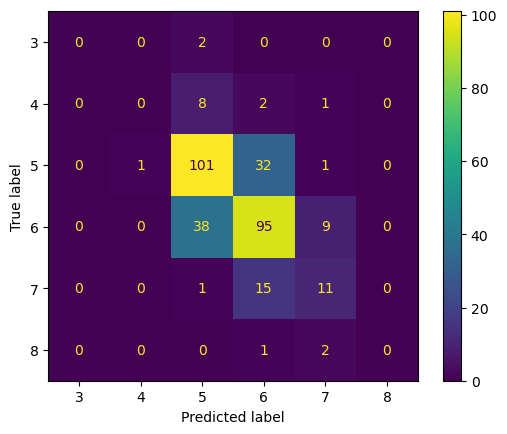

Accuracy MLP NN Classifier on red training is: 0.5785770132916341
Accuracy of MLP NN Classifier on red test data is: 0.590625


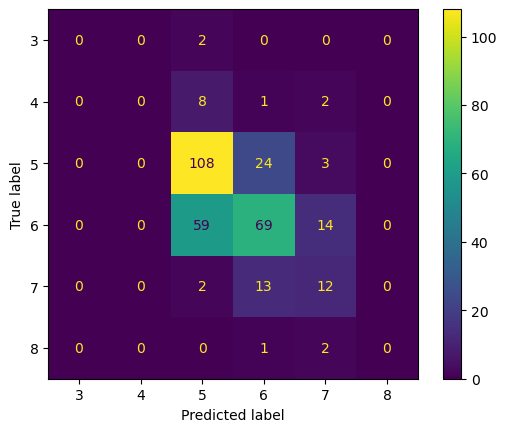

Accuracy MLP NN Classifier on red training is: 0.5566849100860047
Accuracy of MLP NN Classifier on red test data is: 0.578125


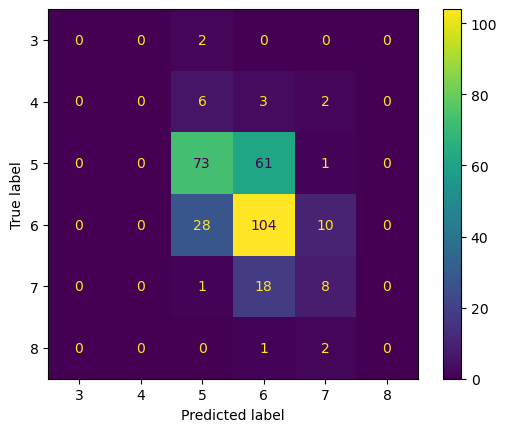

Accuracy MLP NN Classifier on red training is: 0.602814698983581
Accuracy of MLP NN Classifier on red test data is: 0.609375


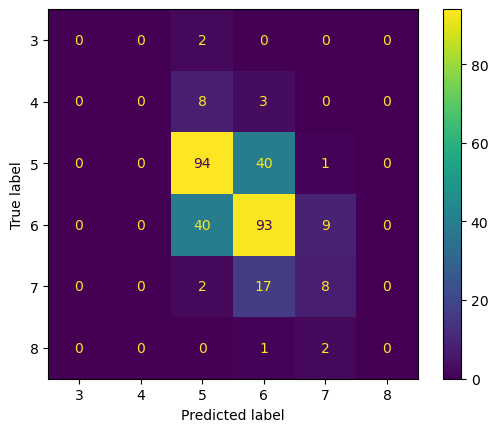

Accuracy MLP NN Classifier on red training is: 0.599687255668491
Accuracy of MLP NN Classifier on red test data is: 0.61875


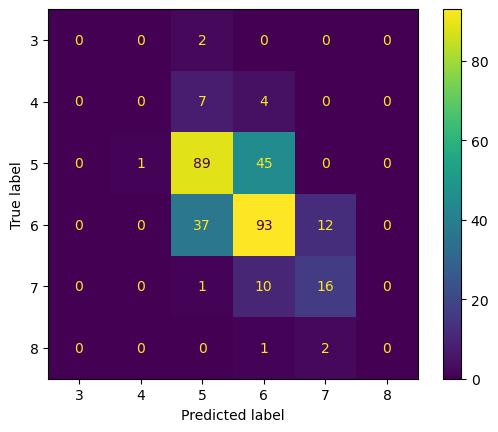

Accuracy MLP NN Classifier on red training is: 0.5903049257232212
Accuracy of MLP NN Classifier on red test data is: 0.596875


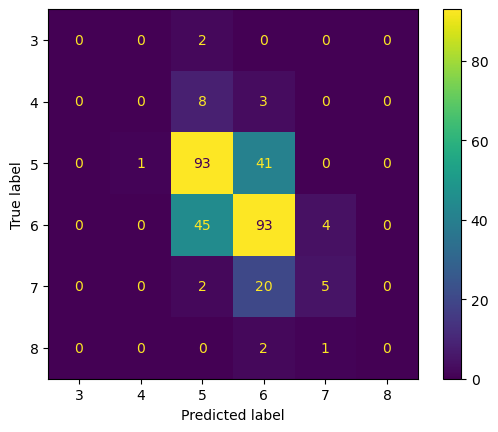

In [631]:
for i in range(10): 
    mlp(whitewinedata, whitewinelabels, "white")

for i in range(10): 
    mlp(redwinedata, redwinelabels, "red")

In [632]:
#Define a function to give us a list of scores specific to one model and winetype
def splitscoreswine(model, winetype):
    modelscore = performance_scores[performance_scores['Model_Type']== model]
    scores = modelscore[modelscore['Wine_Type'] == winetype]
    return scores

#Define a function to give us a list of scores specific to one model
def splitscores(model):
    score = performance_scores[performance_scores['Model_Type']== model]
    return scores


In [633]:
display(performance_scores.loc(0))

mlp_white_scores = splitscoreswine('MultiLayer Perceptron', 'white')
mlp_red_scores = splitscoreswine('MultiLayer Perceptron', 'red')

### All the scores for iterations are the same each run, except for MLP, so we need to average that out, while simply getting the first score in the score list that meets each requirements for the others.  

In [634]:
ave_mlp_white_train = mlp_white_scores.loc[:, 'Training_Score'].mean()
ave_mlp_white_test = mlp_white_scores.loc[:, 'Test_Score'].mean()
ave_mlp_red_train = mlp_red_scores.loc[:, 'Training_Score'].mean()
ave_mlp_red_test = mlp_red_scores.loc[:, 'Test_Score'].mean()

In [635]:
print(ave_mlp_white_train)
print(ave_mlp_white_test)
print(ave_mlp_red_train)
print(ave_mlp_red_test)

0.5217840735068912
0.46520408163265303
0.5946442533229085
0.6098437500000001


In [637]:
#Make a pandas dataframe in which to store average model performance data:
average_scores = pd.DataFrame(columns=['Model_Type', 
                                           'White_Training_Score', 
                                           'White_Test_Score',
                                           'Red_Training_Score',
                                           'Red_Test_Score'])

def getrow(model, wine):
    get_row = performance_scores[
        (performance_scores.Model_Type == model) &
        (performance_scores.Wine_Type == wine)].iloc[0]
    return get_row


average_scores.loc[len(average_scores)] = ['Linear SVC', 
                                           getrow('Linear SVC', 'white')['Training_Score'],
                                           getrow('Linear SVC', 'white')['Test_Score'],
                                           getrow('Linear SVC', 'red')['Training_Score'],
                                           getrow('Linear SVC', 'red')['Test_Score']]

average_scores.loc[len(average_scores)] = ['Polynomial SVC', 
                                           getrow('Polynomial SVC', 'white')['Training_Score'],
                                           getrow('Polynomial SVC', 'white')['Test_Score'],
                                           getrow('Polynomial SVC', 'red')['Training_Score'],
                                           getrow('Polynomial SVC', 'red')['Test_Score']]

average_scores.loc[len(average_scores)] = ['K-Nearest Neighbor', 
                                           getrow('K-Nearest Neighbor', 'white')['Training_Score'],
                                           getrow('K-Nearest Neighbor', 'white')['Test_Score'],
                                           getrow('K-Nearest Neighbor', 'red')['Training_Score'],
                                           getrow('K-Nearest Neighbor', 'red')['Test_Score']]

average_scores.loc[len(average_scores)] = ['SGD Classifier', 
                                           getrow('SGD Classifier', 'white')['Training_Score'],
                                           getrow('SGD Classifier', 'white')['Test_Score'],
                                           getrow('SGD Classifier', 'red')['Training_Score'],
                                           getrow('SGD Classifier', 'red')['Test_Score']]

average_scores.loc[len(average_scores)] = ['MultiLayer Perceptron', 
                                           getrow('MultiLayer Perceptron', 'white')['Training_Score'],
                                           getrow('MultiLayer Perceptron', 'white')['Test_Score'],
                                           getrow('MultiLayer Perceptron', 'red')['Training_Score'],
                                           getrow('MultiLayer Perceptron', 'red')['Test_Score']]

In [638]:
display(average_scores)

,Model_Type,White_Training_Score,White_Test_Score,Red_Training_Score,Red_Test_Score
0,Linear SVC,0.538030,0.491837,0.580141,0.628125
1,Polynomial SVC,0.465033,0.431633,0.509773,0.528125
2,K-Nearest Neighbor,1.000000,0.580612,1.000000,0.618750
3,SGD Classifier,0.456611,0.417347,0.499609,0.556250
4,MultiLayer Perceptron,0.548239,0.472449,0.613761,0.628125


In [640]:
#Report:  
PDF('Exercise3.pdf',size=(800,1200))